In [1537]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
#from callbacks import *
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle 
from sklearn.metrics import accuracy_score
import os
import seaborn as sns

In [1538]:
import warnings
warnings.filterwarnings('ignore')

In [1539]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sub_data = pd.read_csv('sample_submission.csv')

In [1540]:
sub_data = sub_data.drop(["class"], axis=1)

In [1541]:
test_data = pd.merge(sub_data, test_data, how='left', on=['id'])

In [1542]:
train_data = train_data.rename(columns={"ID": "id"})

In [1543]:
test_data.head(5)

,id,appearedTimeOfDay,appearedHour,appearedMinute,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,pressure,weatherIcon,population_density,urban,suburban,midurban,rural,gymDistanceKm,gymIn100m,gymIn250m,gymIn500m,gymIn1000m,gymIn2500m,gymIn5000m,pokestopDistanceKm,pokestopIn100m,pokestopIn250m,pokestopIn500m,pokestopIn1000m,pokestopIn2500m,pokestopIn5000m,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151
0,MTA5MTEwOTYxMzM0NzA2NDEzNzM=,morning,8,26,13,False,Ljubljana,Europe,MostlyCloudy,16.8,2.69,1018.02,partly-cloudy-day,1573.44080,True,True,True,False,0.298720,False,False,True,True,True,True,0.012588,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,MTY0OTUyMTM2MDExMjg3MjczMjU=,night,2,35,13,True,Los_Angeles,America,PartlyCloudy,18.6,13.00,1009.17,partly-cloudy-day,4188.39100,True,True,True,False,0.212500,False,True,True,True,True,True,0.164427,False,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
2,MTQ0ODU1OTEzOTU1NTAyNzI4NjE=,night,0,5,0,True,New_York,America,PartlyCloudy,30.0,9.15,1016.55,partly-clo

In [1544]:
print(test_data.shape)
print(train_data.shape)

(1790, 183)
(7160, 184)


In [1545]:
#把類別轉為one-hot之後，當成y label
# y = pd.get_dummies(train_data['class'].map(pokemon_map))
y = pd.get_dummies(train_data['class'])
train_data = train_data.drop('class', axis=1)

In [1546]:
data = pd.concat([train_data, test_data], ignore_index=False)

In [1547]:
#drop掉一些沒用的feature?

data = data.drop(['id','appearedHour','appearedMinute', 'gymIn100m', 'gymIn250m', 'gymIn500m', 
               'gymIn1000m', 'gymIn2500m', 'gymIn5000m', 'pokestopIn100m', 'pokestopIn250m', 'pokestopIn500m', 
               'pokestopIn1000m', 'pokestopIn2500m', 'pokestopIn5000m'], axis=1)


In [1548]:
data.head()

,appearedTimeOfDay,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,pressure,weatherIcon,population_density,urban,suburban,midurban,rural,gymDistanceKm,pokestopDistanceKm,cooc_1,cooc_2,cooc_3,cooc_4,cooc_5,cooc_6,cooc_7,cooc_8,cooc_9,cooc_10,cooc_11,cooc_12,cooc_13,cooc_14,cooc_15,cooc_16,cooc_17,cooc_18,cooc_19,cooc_20,cooc_21,cooc_22,cooc_23,cooc_24,cooc_25,cooc_26,cooc_27,cooc_28,cooc_29,cooc_30,cooc_31,cooc_32,cooc_33,cooc_34,cooc_35,cooc_36,cooc_37,cooc_38,cooc_39,cooc_40,cooc_41,cooc_42,cooc_43,cooc_44,cooc_45,cooc_46,cooc_47,cooc_48,cooc_49,cooc_50,cooc_51,cooc_52,cooc_53,cooc_54,cooc_55,cooc_56,cooc_57,cooc_58,cooc_59,cooc_60,cooc_61,cooc_62,cooc_63,cooc_64,cooc_65,cooc_66,cooc_67,cooc_68,cooc_69,cooc_70,cooc_71,cooc_72,cooc_73,cooc_74,cooc_75,cooc_76,cooc_77,cooc_78,cooc_79,cooc_80,cooc_81,cooc_82,cooc_83,cooc_84,cooc_85,cooc_86,cooc_87,cooc_88,cooc_89,cooc_90,cooc_91,cooc_92,cooc_93,cooc_94,cooc_95,cooc_96,cooc_97,cooc_98,cooc_99,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,cooc_107,cooc_108,cooc_109,cooc_110,cooc_111,cooc_112,cooc_113,cooc_114,cooc_115,cooc_116,cooc_117,cooc_118,cooc_119,cooc_120,cooc_121,cooc_122,cooc_123,cooc_124,cooc_125,cooc_126,cooc_127,cooc_128,cooc_129,cooc_130,cooc_131,cooc_132,cooc_133,cooc_134,cooc_135,cooc_136,cooc_137,cooc_138,cooc_139,cooc_140,cooc_141,cooc_142,cooc_143,cooc_144,cooc_145,cooc_146,cooc_147,cooc_148,cooc_149,cooc_150,cooc_151
0,evening,13,False,Bangkok,Asia,Clear,27.8,9.00,1008.96,clear-day,6019.04440,True,True,True,False,0.523759,0.144120,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,night,13,True,New_York,America,Clear,26.1,8.70,1018.96,clear-night,0.00000,False,False,False,True,0.565267,0.198728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,evening,0,True,New_York,America,Clear,24.7,16.82,1023.22,clear-day,0.00000,False,False,False,True,0.195366,0.070373,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,F

In [1549]:
#drop掉cooc feature

cooc_feature = [col for col in data.columns if 'cooc' in col]
save_cooc_feature = [27, 72, 79, 81, 100, 102]

drop_cooc_feature = [col for col in cooc_feature if int(col.split("cooc_")[1]) not in save_cooc_feature]
data = data.drop(drop_cooc_feature, axis=1)

In [1550]:
pd.set_option('display.max_columns',None)
data.head()

,appearedTimeOfDay,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,pressure,weatherIcon,population_density,urban,suburban,midurban,rural,gymDistanceKm,pokestopDistanceKm,cooc_27,cooc_72,cooc_79,cooc_81,cooc_100,cooc_102
0,evening,13,False,Bangkok,Asia,Clear,27.8,9.00,1008.96,clear-day,6019.04440,True,True,True,False,0.523759,0.144120,False,False,False,False,False,False
1,night,13,True,New_York,America,Clear,26.1,8.70,1018.96,clear-night,0.00000,False,False,False,True,0.565267,0.198728,False,False,False,False,False,False
2,evening,0,True,New_York,America,Clear,24.7,16.82,1023.22,clear-day,0.00000,False,False,False,True,0.195366,0.070373,False,False,False,False,False,False
3,morning,0,True,Hobart,Australia,Clear,12.7,13.25,1014.19,clear-night,128.89505,False,False,False,True,0.190119,0.003920,False,False,False,False,False,False
4,evening,13,True,Los_Angeles,America,PartlyCloudy,19.1,5.78,1011.36,partly-cloudy-day,4188.39100,True,True,True,False,0.066120,0.071638,False,True,False,False,False,False


In [1551]:
data[['pokestopDistanceKm']].describe()

,pokestopDistanceKm
count,8950.000000
mean,0.562968
std,7.479792
min,0.000319
25%,0.050799
50%,0.132209
75%,0.310317
max,455.313099


In [1552]:
temp_data = data['population_density']
data.loc[temp_data<=69.6,"population_density"] = 1
data.loc[(temp_data<635.55)& (temp_data>=69.6),"population_density"] = 2
data.loc[(temp_data<1955.86)& (temp_data>=635.55),"population_density"] = 3
data.loc[(temp_data>=1955.86),"population_density"] = 4


In [1553]:
#terrainType是類別型資料
data['terrainType'] = data['terrainType'].astype(str)

data['population_density'] = data['population_density'].astype(str)

In [1554]:

numeric_features = data.select_dtypes(include=[np.number])
for i in numeric_features.columns:
    data[i]=np.log1p(data[i])


In [1555]:
#距離太遠的直接給他一個定植

mask = data['gymDistanceKm'] > 1
data.loc[mask, 'gymDistanceKm'] = 1

mask = data['pokestopDistanceKm'] > 1
data.loc[mask, 'pokestopDistanceKm'] = 1



In [1556]:
#把bool型態轉為1跟0
bool_features=data.select_dtypes(include=[np.bool]).columns
for col in bool_features:
    data[col] = data[col].astype(int)

In [1557]:
data.head()

,appearedTimeOfDay,terrainType,closeToWater,city,continent,weather,temperature,windSpeed,pressure,weatherIcon,population_density,urban,suburban,midurban,rural,gymDistanceKm,pokestopDistanceKm,cooc_27,cooc_72,cooc_79,cooc_81,cooc_100,cooc_102
0,evening,13,0,Bangkok,Asia,Clear,3.360375,2.302585,6.917666,clear-day,4.0,1,1,1,0,0.421180,0.134636,0,0,0,0,0,0
1,night,13,1,New_York,America,Clear,3.299534,2.272126,6.927519,clear-night,1.0,0,0,0,1,0.448056,0.181261,0,0,0,0,0,0
2,evening,0,1,New_York,America,Clear,3.246491,2.880321,6.931687,clear-day,1.0,0,0,0,1,0.178452,0.068007,0,0,0,0,0,0
3,morning,0,1,Hobart,Australia,Clear,2.617396,2.656757,6.922831,clear-night,2.0,0,0,0,1,0.174053,0.003912,0,0,0,0,0,0
4,evening,13,1,Los_Angeles,America,PartlyCloudy,3.000720,1.913977,6.920040,partly-cloudy-day,4.0,1,1,1,0,0.064026,0.069188,0,1,0,0,0,0


In [1558]:
#類別型變數轉one-hot encode
data = pd.get_dummies(data)

In [1559]:
#temp_data = data['population_density']

#data['population_density'] = (temp_data - np.mean(temp_data))/(np.max(temp_data)-np.min(temp_data))

In [1560]:
#data['population_density'] = data['population_density'] - np.mean(data['population_density'])

#feature scale normalize
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
#data['population_density'] = scaler.fit_transform(data['population_density'].values.reshape(-1, 1))
#data['pressure'] = scaler.fit_transform(data['pressure'].values.reshape(-1, 1))
#data['temperature'] = scaler.fit_transform(data['temperature'].values.reshape(-1, 1))
#data['windSpeed'] = scaler.fit_transform(data['windSpeed'].values.reshape(-1, 1))
#data['gymDistanceKm'] = scaler.fit_transform(data['gymDistanceKm'].values.reshape(-1, 1))
#data['pokestopDistanceKm'] = scaler.fit_transform(data['pokestopDistanceKm'].values.reshape(-1, 1))


sc = StandardScaler()
#data['population_density'] = sc.fit_transform(data['population_density'].values.reshape(-1, 1))
data['gymDistanceKm'] = sc.fit_transform(data['gymDistanceKm'].values.reshape(-1, 1))
data['pokestopDistanceKm'] = sc.fit_transform(data['pokestopDistanceKm'].values.reshape(-1, 1))
data['pressure'] = scaler.fit_transform(data['pressure'].values.reshape(-1, 1))
data['temperature'] = scaler.fit_transform(data['temperature'].values.reshape(-1, 1))
data['windSpeed'] = scaler.fit_transform(data['windSpeed'].values.reshape(-1, 1))
#X_train_std = sc.transform(X_train)
#X_test_std = sc.transform(X_test)

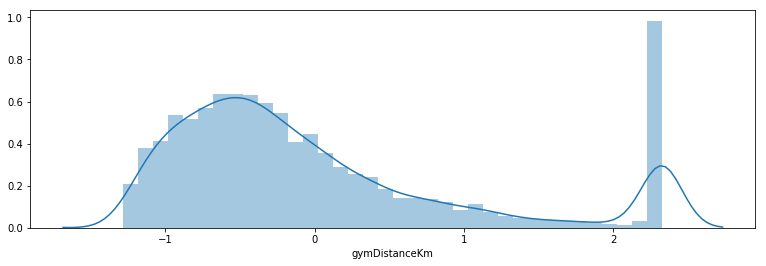

In [1561]:
sns.distplot(data["gymDistanceKm"])

In [1562]:
data.head()

,closeToWater,temperature,windSpeed,pressure,urban,suburban,midurban,rural,gymDistanceKm,pokestopDistanceKm,cooc_27,cooc_72,cooc_79,cooc_81,cooc_100,cooc_102,appearedTimeOfDay_afternoon,appearedTimeOfDay_evening,appearedTimeOfDay_morning,appearedTimeOfDay_night,terrainType_0,terrainType_1,terrainType_10,terrainType_11,terrainType_12,terrainType_13,terrainType_14,terrainType_16,terrainType_2,terrainType_4,terrainType_5,terrainType_7,terrainType_8,terrainType_9,city_Adelaide,city_Amsterdam,city_Athens,city_Auckland,city_Bahia,city_Bangkok,city_Belem,city_Berlin,city_Boise,city_Brisbane,city_Brunei,city_Brussels,city_Bucharest,city_Buenos_Aires,city_Casablanca,city_Chicago,city_Copenhagen,city_Denver,city_Detroit,city_Dubai,city_Dublin,city_Edmonton,city_Guam,city_Halifax,city_Helsinki,city_Ho_Chi_Minh,city_Hobart,city_Hong_Kong,city_Honolulu,city_Indianapolis,city_Jakarta,city_Karachi,city_Kolkata,city_Kuala_Lumpur,city_Kuching,city_Lisbon,city_Ljubljana,city_London,city_Los_Angeles,city_Louisville,city_Luanda,city_Madrid,city_Manila,city_Melbourne,city_Mexico_City,city_Monterrey,city_Montreal,city_New_York,city_Nicosia,city_Noumea,city_Oslo,city_Paris,city_Perth,city_Phoenix,city_Prague,city_Puerto_Rico,city_Regina,city_Rome,city_Santiago,city_Sao_Paulo,city_Singapore,city_Stockholm,city_Sydney,city_Tahiti,city_Taipei,city_Tokyo,city_Toronto,city_Tripoli,city_Tunis,city_Vancouver,city_Vienna,city_Vilnius,city_Warsaw,city_Zagreb,city_Zurich,continent_Africa,continent_America,continent_America/Argentina,continent_America/Indiana,continent_America/Kentucky,continent_Asia,continent_Australia,continent_Europe,continent_Pacific,weather_Breezy,weather_BreezyandMostlyCloudy,weather_BreezyandOvercast,weather_BreezyandPartlyCloudy,weather_Clear,weather_DangerouslyWindy,weather_Drizzle,weather_DrizzleandBreezy,weather_Dry,weather_DryandPartlyCloudy,weather_Foggy,weather_HeavyRain,weather_Humid,weather_HumidandOvercast,weather_HumidandPartlyCloudy,weather_LightRain,weather_LightRainandBreezy,weather_MostlyCloudy,weather_Overcast,weather_PartlyCloudy,weather_Rain,weather_RainandWindy,weather_Windy,weather_WindyandFoggy,weather_WindyandPartlyCloudy,weatherIcon_clear-day,weatherIcon_clear-night,weatherIcon_cloudy,weatherIcon_fog,weatherIcon_partly-cloudy-day,weatherIcon_partly-cloudy-night,weatherIcon_rain,weatherIcon_wind,population_density_1.0,population_density_2.0,population_density_3.0,population_density_4.0
0,0,0.807492,0.569196,0.337931,1,1,1,0,0.229498,-0.321456,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,1,0.776834,0.561666,0.602509,0,0,0,1,0.326918,-0.125466,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,1,0.750106,0.712012,0.714432,0,0,0,1,-0.650342,-0.601530,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,1,0.433112,0.656747,0.476631,0,0,0,1,-0.666288,-0.870954,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1,0.626265,0.473133,0.401668,1,1,1,0,-1.065116,-0.596566,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [1563]:
X = data[:len(y)]

In [1564]:
#train validation split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [1565]:
''' Import keras to build a DL model '''
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, LeakyReLU, Dropout
from keras.optimizers import SGD, RMSprop, Adam
from keras.callbacks import EarlyStopping
from keras.layers.advanced_activations import LeakyReLU, PReLU

def build_model(X, drp_rate,leaky_rate):
    model = Sequential()
    # 第一層的hidden laryer (512 neurons)與指定 input 的維度
    model.add(Dense(128, input_dim=X.shape[-1]))
    model.add(LeakyReLU(alpha=leaky_rate))
    model.add(Dropout(drp_rate))
    
    # 第三層的hidden laryer (1024 neurons)與指定 input 的維度
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=leaky_rate))
    model.add(Dropout(drp_rate))
    
    
    # 第三層的hidden laryer (1024 neurons)與指定 input 的維度
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=leaky_rate))
    model.add(Dropout(drp_rate))
    
    # 第三層的hidden laryer (1024 neurons)與指定 input 的維
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=leaky_rate))
    model.add(Dropout(drp_rate))
    
    
    # 第三層的hidden laryer (1024 neurons)與指定 input 的維
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=leaky_rate))
    model.add(Dropout(drp_rate))
    
    # 第五層的hidden laryer (256 neurons)與指定 input 的維度
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=leaky_rate))
    model.add(Dropout(drp_rate))
    
    model.add(Dense(6))
    model.add(Activation('softmax'))
    return model

In [1570]:
import keras.backend as K
#@title Dropout Comparison { vertical-output: false, display-mode: "both" }

# 建立一個list存放待會要做比較的 dropout rates
#dropout_rates = [0, 0.1, 0.2, 0.4, 0.6,0.8]  #@param {type:"raw"}

# 建立兩個train_list來儲存之後使用不同數值dropout rate訓練出來的結果
train_loss_list = []
train_acc_list = []

# 建立兩個valid_list來儲存之後使用不同數值dropout rate驗證出來的結果
valid_loss_list = []
valid_acc_list = []

dropout_rates = [0.4]
leaky_rate= [0.1]
for drp_rate in dropout_rates:
    for ly_rate in leaky_rate:
        K.clear_session() # 清掉上次訓練的結果

        ''' 編譯模型 '''
        # 將建構好的模型存放至model變數
        # 用ex06中，結果較優的Adam當作我們的 optimizer
        # accuracy當作我們的指標
        model = build_model(X,drp_rate,ly_rate)
        optim = Adam(lr=5e-5)
        model.compile(loss='categorical_crossentropy',
                      optimizer=optim,
                      metrics=['accuracy'])

        batch_size=512
        epochs = 3000
        n_patience = 30

        # 建EarlyStopping
        early_stopping = EarlyStopping(monitor = 'val_loss', 
                                   patience = n_patience, 
                                   verbose = 1)

        history = model.fit(X, y,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=0,
                            shuffle=True,
                            validation_split=0.1,
                            callbacks=[early_stopping])

        # 將(val)loss 和 (val)acc 儲存之後在裝進(valild)train_loss/acc變數中
        # 儲存每一個不同regularization的結果，最後用於繪製結果

        loss = history.history.get('loss')
        acc = history.history.get('acc')
        val_loss = history.history.get('val_loss')
        val_acc = history.history.get('val_acc')

        train_loss_list.append(loss)
        train_acc_list.append(acc)
        valid_loss_list.append(val_loss)
        valid_acc_list.append(val_acc)

Epoch 00671: early stopping


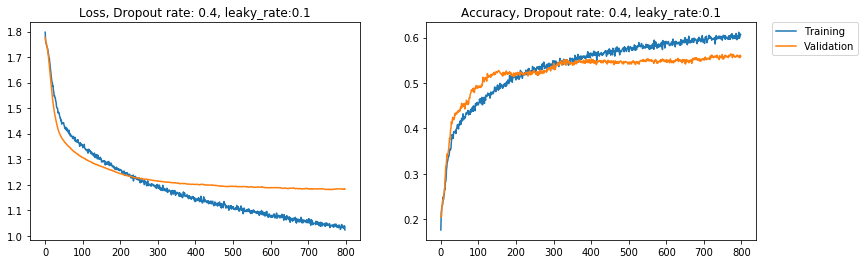

0.5642458090569054
0.6072315325802117


In [1569]:
''' Visualize the training/validation loss and training/validation accuracy'''
from pylab import rcParams
rcParams['figure.figsize'] = 13, 4

for i in range(len(dropout_rates)):
    for k in range(len(leaky_rate)):
        plt.figure(0)
        drp_rate = dropout_rates[i]
        ly_rate = leaky_rate[k]
        plt.subplot(121)
        loss = train_loss_list[i*len(leaky_rate)+k]
        val_loss = valid_loss_list[i*len(leaky_rate)+k]
        plt.plot(range(len(loss)), loss, label='Training')
        plt.plot(range(len(val_loss)), val_loss, label='Validation')
        title = 'Loss, Dropout rate: {}, leaky_rate:{}'.format(drp_rate,ly_rate)
        plt.title(title)

        plt.subplot(122)
        acc = train_acc_list[i*len(leaky_rate)+k]
        val_acc = valid_acc_list[i*len(leaky_rate)+k]
        plt.plot(range(len(acc)), acc, label='Training')
        plt.plot(range(len(val_acc)), val_acc, label='Validation')
        title = 'Accuracy, Dropout rate: {}, leaky_rate:{}'.format(drp_rate,ly_rate)
        plt.title(title)

        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

        plt.show()
        print(np.max(val_acc))
        print(acc[-1])

In [1458]:
val_acc[-1]

0.5558659211217358

In [1339]:
# dropout 0.4 => 0.586
# dropout 0.5 => 0.579
# dropout 0.6 => 0.576
# dropout 0.7 => 0.562

In [1571]:
pred = model.predict(data[len(y):])

In [1572]:
np.argmax(pred, axis=1)

array([2, 0, 4, ..., 1, 3, 1])

In [1573]:
output = pd.DataFrame({'id': sub_data["id"],'class': np.argmax(pred, axis=1)})
output.to_csv('submission.csv', index=False) 

In [1078]:
from keras.models import load_model

#儲存模型
#model.save('pokemon_v1.h5')

#匯入模型
model = load_model('pokemon_v1.h5')